<a href="https://colab.research.google.com/github/ankitbittu/Telecom-Churn-Analysis/blob/main/Copy_of_Telecom_Churn_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Orange S.A., formerly France Télécom S.A., is a French multinational telecommunications corporation. The Orange Telecom's Churn Dataset, consists of cleaned customer activity data (features), along with a churn label specifying whether a customer canceled the subscription.

## <b> Explore and analyze the data to discover key factors responsible for customer churn and come up with ways/recommendations to ensure customer retention. </b>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [131]:
file_path = '/content/drive/MyDrive/Almabetter/Capstone project 1/Copy of Telecom Churn.csv'
telecom_df=pd.read_csv(file_path)

# **Understanding the columns present in the dataset**

**STATE**: The number of unique states present in dataset in 51.

Account Length: Length of The Account

Area Code: 415 relates to San Francisco,408 is of San Jose and 510 is of City of Okland

International Plan: Yes Indicate International Plan is Present and No Indicates no subscription for Internatinal Plan

Voice Mail Plan: Yes Indicates Voice Mail Plan is Present and No Indicates no subscription for Voice Mail Plan

Number vmail messages: Number of Voice Mail Messages ranging from 0 to 50

Total day minutes: Total Number of Minutes Spent By Customers in Morning

Total day calls: Total Number of Calls made by Customer in Morning.

Total day charge: Total Charge to the Customers in Morning.

Total eve minutes: Total Number of Minutes Spent By Customers in Evening

Total eve calls: Total Number of Calls made by Customer in Evening.

Total eve charge: Total Charge to the Customers in Morning.

Total night minutes: Total Number of Minutes Spent By Customers in the Night.

Total night calls: Total Number of Calls made by Customer in Night.

Total night charge: Total Charge to the Customers in Night.

Total intl minutes: Total Number of Minutes Spent By Customers Internationally.

Total intl calls: Total Number of Calls made by Customer Internationally.

Total intl charge: Total Charge to the Customers on International calls.

Customer service calls: Total number of Customer service calls.

Churn: True means customer churned and False means customer not churned

In [122]:
telecom_df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn,Total charges
0,KS,128,415,False,True,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False,75.56
1,OH,107,415,False,True,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False,59.24
2,NJ,137,415,False,False,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False,62.29
3,OH,84,408,True,False,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False,66.80
4,OK,75,415,True,False,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False,52.09


In [ ]:
telecom_df.tail()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
3328,AZ,192,415,No,Yes,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3329,WV,68,415,No,No,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3330,RI,28,510,No,No,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
3331,CT,184,510,Yes,No,0,213.8,105,36.35,159.6,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False
3332,TN,74,415,No,Yes,25,234.4,113,39.85,265.9,82,22.60,241.4,77,10.86,13.7,4,3.70,0,False


In [ ]:
telecom_df.shape

(3333, 20)

In [ ]:
telecom_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   3333 non-null   object 
 1   Account length          3333 non-null   int64  
 2   Area code               3333 non-null   int64  
 3   International plan      3333 non-null   object 
 4   Voice mail plan         3333 non-null   object 
 5   Number vmail messages   3333 non-null   int64  
 6   Total day minutes       3333 non-null   float64
 7   Total day calls         3333 non-null   int64  
 8   Total day charge        3333 non-null   float64
 9   Total eve minutes       3333 non-null   float64
 10  Total eve calls         3333 non-null   int64  
 11  Total eve charge        3333 non-null   float64
 12  Total night minutes     3333 non-null   float64
 13  Total night calls       3333 non-null   int64  
 14  Total night charge      3333 non-null   

There are no any null values present in any row. So, need to clean the data for null values.

There are also different kinds of dtype objects are present.

Converting the dtype of International plan and Voice mail plan from object to bool to make easier analysis on these columns.


In [132]:
telecom_df['International plan'] = telecom_df['International plan'].replace({'Yes':True,'No':False})
telecom_df['Voice mail plan'] = telecom_df['Voice mail plan'].replace({'Yes':True,'No':False})

In [133]:
telecom_df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,False,True,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,False,True,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,False,False,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,True,False,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,True,False,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


# Finding total number of churned users

In [134]:
telecom_df['Churn'].value_counts()

False    2850
True      483
Name: Churn, dtype: int64

Out of the total 3333 customers, 2850 customers are retained and the rest 483 are churning the telecom service.

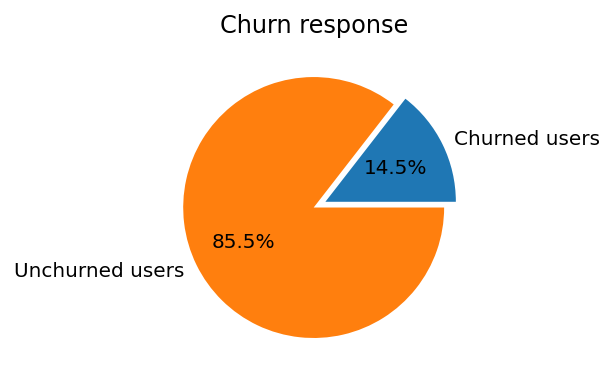

In [178]:
Percent_churned_users = round((telecom_df['Churn'].mean() * 100),3)
Percent_unchurned_users = round((100 - Percent_churned_users),3)
x = [Percent_churned_users, Percent_unchurned_users]
labels = ['Churned users', 'Unchurned users']
explode = [0.1, 0]

fig, ax = plt.subplots(figsize=(4,3),dpi = 144)
ax.pie(x, labels = labels,explode = explode, autopct='%1.1f%%')
ax.set_title('Churn response')
plt.show()

# Deep dive into the statistical analysis of columns which are having numerical data

In [139]:
telecom_df.describe()

,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


From the above table, it can be seen that customers have talked less during the day time as compare to evening and night time.

The average number of calls during day, evening and night are almost the same.

Despite having less number of talking minutes during the day time, the charges incurred to the customer is high as compare to evening and night talking minutes.


It can also be visualised in the plot shown below

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


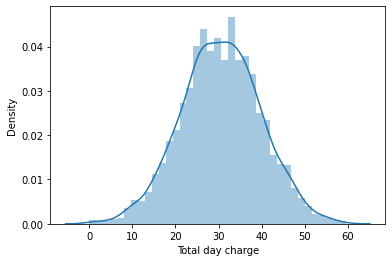

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


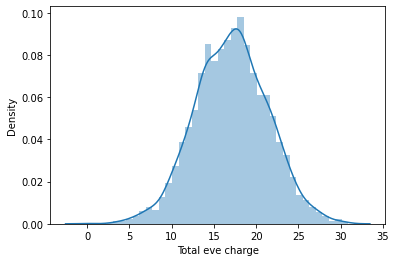

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


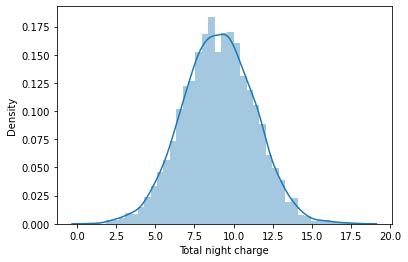

In [ ]:
sb.distplot(telecom_df['Total day charge'])
plt.show()
sb.distplot(telecom_df['Total eve charge'])
plt.show()
sb.distplot(telecom_df['Total night charge'])
plt.show()

# Taking International plan column into account and take some insights from it.

In [126]:
telecom_df['International plan'].value_counts()

False    3010
True      323
Name: International plan, dtype: int64

There are 323 customers out of 3333 who are using the International plan.

Now creating two dataframes one containing the customers who have International plan and other one who don't have the International plan.

In [141]:
Intl_plan_true_df  = telecom_df[telecom_df['International plan'] == True]     # Those who have taken the international plan
Intl_plan_false_df  = telecom_df[telecom_df['International plan'] == False]   # Those who have not taken the international plan

In [142]:
Intl_plan_true_df[['Total intl minutes','Total intl charge']].describe()

,Total intl minutes,Total intl charge
count,323.000000,323.000000
mean,10.628173,2.869907
std,2.697787,0.728151
min,1.300000,0.350000
25%,9.000000,2.430000
50%,10.800000,2.920000
75%,12.200000,3.290000
max,20.000000,5.400000


In [124]:
Intl_plan_false_df[['Total intl minutes','Total intl charge']].describe()

,Total intl minutes,Total intl charge
count,3010.000000,3010.000000
mean,10.195349,2.753279
std,2.798937,0.755716
min,0.000000,0.000000
25%,8.400000,2.270000
50%,10.200000,2.750000
75%,12.100000,3.270000
max,18.900000,5.100000


From the above two tables, it is clearly visible that customers having the International plan are paying almost the same charges for the same International calling minutes as compare to the customers not having the International plan.

Further it can also be seen the plot given below.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


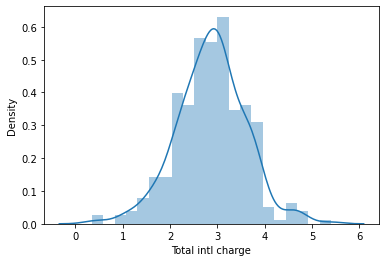

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


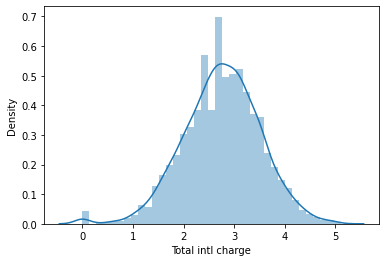

In [ ]:
sb.distplot(Intl_plan_true_df['Total intl charge'])
plt.show()
sb.distplot(Intl_plan_false_df['Total intl charge'])
plt.show()

Drawing a pivot table for the Customers who have taken the International plan considering the churning part.

In [147]:
pd.crosstab(telecom_df["International plan"], telecom_df["Churn"])

Churn,False,True
International plan,,
False,2664,346
True,186,137


The number of customers who have taken the International plan has higher churning rate as compare to those who has not taken.

In [149]:
Intl_churn_rate = telecom_df.groupby(['International plan'])['Churn'].agg([np.mean]).rename(columns = {'mean':'churn_rate'})

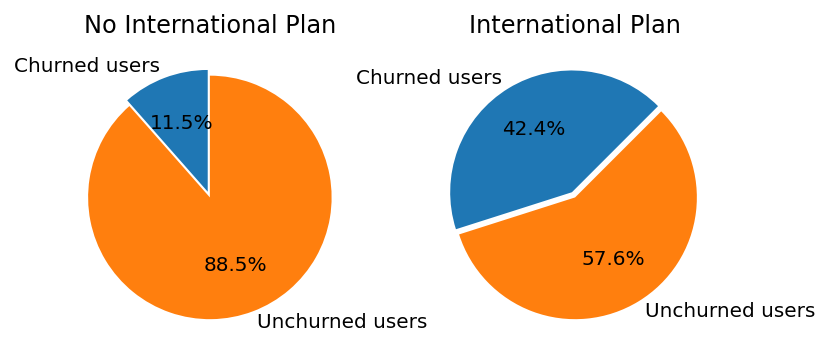

In [183]:
churn_perct_with_no_Intl_plan = round((Intl_churn_rate.iloc[0,0]*100),3)
unchurn_perct_with_no_Intl_plan = 100 - churn_perct_with_no_Intl_plan

churn_perct_with_Intl_plan = round((Intl_churn_rate.iloc[1,0]*100),3)
unchurn_perct_with_Intl_plan = 100 - churn_perct_with_Intl_plan


x1 = [churn_perct_with_no_Intl_plan, unchurn_perct_with_no_Intl_plan]
x2 = [churn_perct_with_Intl_plan, unchurn_perct_with_Intl_plan]

labels = ['Churned users', 'Unchurned users']
explode = [0.05, 0]

fig = plt.figure(figsize=(6,7),dpi=144)
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
ax1.pie(x1, labels = labels,explode = explode, autopct='%1.1f%%', startangle=90)
ax2.pie(x2, labels = labels,explode = explode, autopct='%1.1f%%', startangle=45)
ax1.set_title('No International Plan')
ax2.set_title('International Plan')
plt.show()

In [ ]:
#telecom_df['Total charges'] = telecom_df['Total day charge'] + telecom_df['Total eve charge'] + telecom_df['Total night charge'] + telecom_df['Total intl charge']

In [125]:
#telecom_df[numerical].hist(figsize=(20,20));

# Considering Voice mail plan in the next part. In this, the proportion of users who are churning with respect to the their voice mail plan is found out.

In [127]:
#telecom_df['Voice mail plan'].value_counts()

In [184]:
pd.crosstab(telecom_df["Voice mail plan"], telecom_df["Churn"])

Churn,False,True
Voice mail plan,,
False,2008,403
True,842,80


It is interesting to see that the number of customers who are not using the Voice mail plan are churning more as compare to those who have no Voice mail plan.

In [185]:
voice_churn_rate = telecom_df.groupby(['Voice mail plan'])['Churn'].agg([np.mean]).rename(columns = {'mean':'churn_rate'})

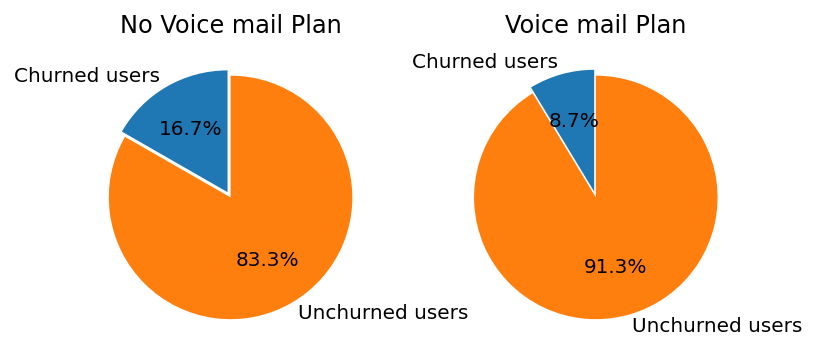

In [188]:
churn_perct_with_no_voice_plan = round((voice_churn_rate.iloc[0,0]*100),3)
unchurn_perct_with_no_voice_plan = 100 - churn_perct_with_no_voice_plan

churn_perct_with_voice_plan = round((voice_churn_rate.iloc[1,0]*100),3)
unchurn_perct_with_voice_plan = 100 - churn_perct_with_voice_plan


x1 = [churn_perct_with_no_voice_plan, unchurn_perct_with_no_voice_plan]
x2 = [churn_perct_with_voice_plan, unchurn_perct_with_voice_plan]

labels = ['Churned users', 'Unchurned users']
explode = [0.05, 0]

fig = plt.figure(figsize=(6,7),dpi=144)
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
ax1.pie(x1, labels = labels,explode = explode, autopct='%1.1f%%', startangle=90)
ax2.pie(x2, labels = labels,explode = explode, autopct='%1.1f%%', startangle=90)
ax1.set_title('No Voice mail Plan')
ax2.set_title('Voice mail Plan')
plt.show()

# Area code wise Churned users

In [189]:
telecom_df.groupby('Area code')['Churn'].value_counts()

Area code  Churn
408        False     716
           True      122
415        False    1419
           True      236
510        False     715
           True      125
Name: Churn, dtype: int64

In [191]:
pd.pivot_table(telecom_df,index=['Area code'],values=['Churn'])

,Churn
Area code,
408,0.145585
415,0.142598
510,0.148810


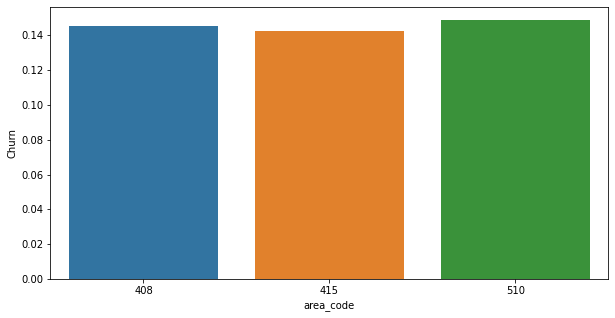

In [194]:
area_churn = pd.pivot_table(telecom_df,index=['Area code'],values=['Churn'])
area_churn['area_code'] = area_churn.index

plt.figure(figsize=(10,5))
sb.barplot(y='Churn', x='area_code', data=area_churn)


The churn rate of customers is approximately same for each area code. So, this area code data is not providing any kind of inference in order to solve the churning problem.

# Taking all the day, evening, night columns with respect to the Churn

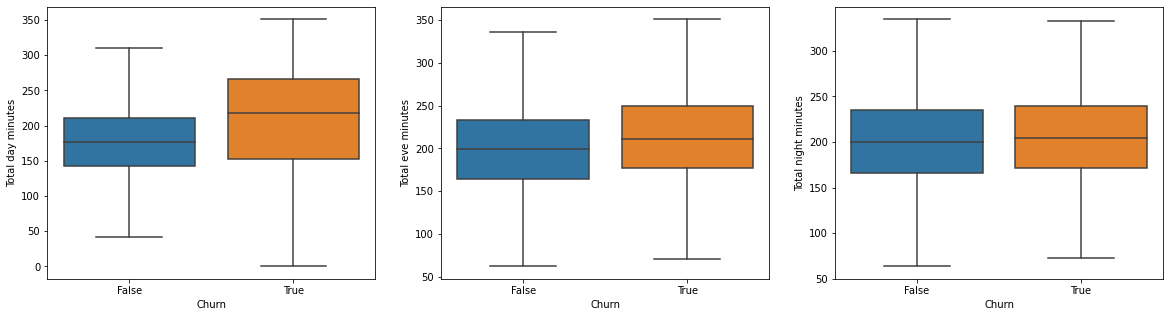

In [199]:
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sb.boxplot(y='Total day minutes', x='Churn', data=telecom_df, sym = '')

plt.subplot(1,3,2)
sb.boxplot(y='Total eve minutes', x='Churn', data=telecom_df, sym = '')

plt.subplot(1,3,3)
sb.boxplot(y='Total night minutes', x='Churn', data=telecom_df, sym = '')

plt.show()

This clearly shows that during the day time, customers who are churning out have higher talking minutes as compare to the non-churning customer.

For the evening and the night time, talking minutes is almost same for churned and non-churned customers in each case. So, these two columns won't contribute for the churn analysis. 

It can also be seen by using the describe table.

In [200]:
churned_users = telecom_df[telecom_df['Churn'] == True]
unchurned_users = telecom_df[telecom_df['Churn'] == False]

In [201]:
churned_users.describe()

,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
count,483.000000,483.000000,483.000000,483.000000,483.000000,483.000000,483.000000,483.000000,483.000000,483.000000,483.000000,483.000000,483.00000,483.000000,483.000000,483.000000
mean,102.664596,437.817805,5.115942,206.914079,101.335404,35.175921,212.410145,100.561077,18.054969,205.231677,100.399586,9.235528,10.70000,4.163561,2.889545,2.229814
std,39.467820,42.792270,11.860138,68.997792,21.582307,11.729710,51.728910,19.724711,4.396762,47.132825,19.950659,2.121081,2.79319,2.551575,0.754152,1.853275
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,70.900000,48.000000,6.030000,47.400000,49.000000,2.130000,2.00000,1.000000,0.540000,0.000000
25%,76.000000,408.000000,0.000000,153.250000,87.500000,26.055000,177.100000,87.000000,15.055000,171.250000,85.000000,7.705000,8.80000,2.000000,2.380000,1.000000
50%,103.000000,415.000000,0.000000,217.600000,103.000000,36.990000,211.300000,101.000000,17.960000,204.800000,100.000000,9.220000,10.60000,4.000000,2.860000,2.000000
75%,127.000000,510.000000,0.000000,265.950000,116.500000,45.210000,249.450000,114.000000,21.205000,239.850000,115.000000,10.795000,12.80000,5.000000,3.460000,4.000000
max,225.000000,510.000000,48.000000,350.800000,165.000000,59.640000,363.700000,168.000000,30.910000,354.900000,158.000000,15.970000,20.00000,20.000000,5.400000,9.000000


In [202]:
unchurned_users.describe()

,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
count,2850.000000,2850.000000,2850.000000,2850.000000,2850.000000,2850.000000,2850.000000,2850.000000,2850.000000,2850.000000,2850.000000,2850.000000,2850.000000,2850.000000,2850.000000,2850.000000
mean,100.793684,437.074737,8.604561,175.175754,100.283158,29.780421,199.043298,100.038596,16.918909,200.133193,100.058246,9.006074,10.158877,4.532982,2.743404,1.449825
std,39.882350,42.306156,13.913125,50.181655,19.801157,8.530835,50.292175,19.958414,4.274863,51.105032,19.506246,2.299768,2.784489,2.441984,0.751784,1.163883
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,73.000000,408.000000,0.000000,142.825000,87.000000,24.282500,164.500000,87.000000,13.980000,165.900000,87.000000,7.470000,8.400000,3.000000,2.270000,1.000000
50%,100.000000,415.000000,0.000000,177.200000,100.000000,30.120000,199.600000,100.000000,16.970000,200.250000,100.000000,9.010000,10.200000,4.000000,2.750000,1.000000
75%,127.000000,510.000000,22.000000,210.300000,114.000000,35.750000,233.200000,114.000000,19.820000,234.900000,113.000000,10.570000,12.000000,6.000000,3.240000,2.000000
max,243.000000,510.000000,51.000000,315.600000,163.000000,53.650000,361.800000,170.000000,30.750000,395.000000,175.000000,17.770000,18.900000,19.000000,5.100000,8.000000


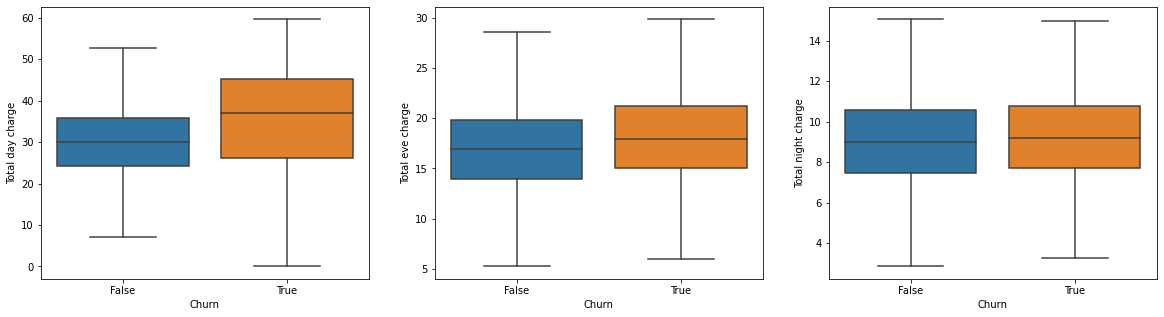

In [203]:
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sb.boxplot(y='Total day charge', x='Churn', data=telecom_df, sym = '')

plt.subplot(1,3,2)
sb.boxplot(y='Total eve charge', x='Churn', data=telecom_df, sym = '')

plt.subplot(1,3,3)
sb.boxplot(y='Total night charge', x='Churn', data=telecom_df, sym = '')

plt.show()

These plots for day, evening and night charges are similar to the minutes plot shown above. It is quite obvious that more talking minutes will incur more charges. Similarly, evening and night charge are not contributing to churn analysis.

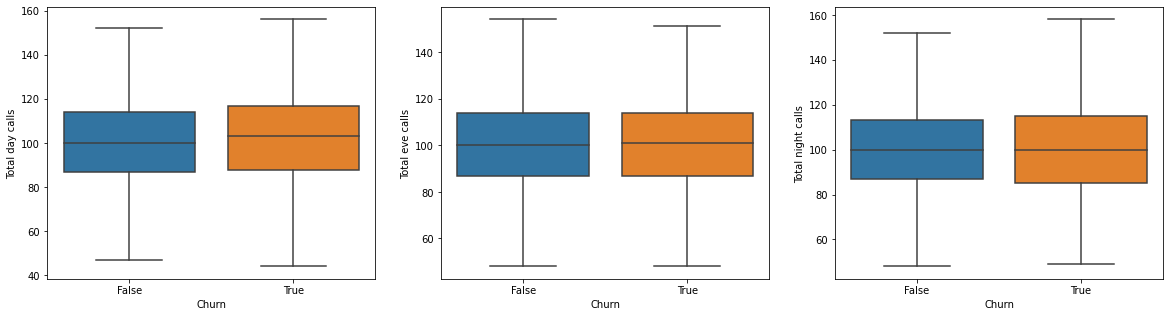

In [204]:
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sb.boxplot(y='Total day calls', x='Churn', data=telecom_df, sym = '')

plt.subplot(1,3,2)
sb.boxplot(y='Total eve calls', x='Churn', data=telecom_df, sym = '')

plt.subplot(1,3,3)
sb.boxplot(y='Total night calls', x='Churn', data=telecom_df, sym = '')

plt.show()

Average calls for day, evening and night are almost similar for both churned and unchurned users. So, these columns cannot be used for churn data analysis.

# Now Considering Customer service calls with respect to churn

In [92]:
pd.crosstab(telecom_df["Customer service calls"], telecom_df["Churn"])

Churn,False,True
Customer service calls,,
0,605,92
1,1059,122
2,672,87
3,385,44
4,90,76
5,26,40
6,8,14
7,4,5
8,1,1


In [205]:
customer_call_churn = telecom_df.groupby(['Customer service calls'])['Churn'].agg([np.mean]).rename(columns = {'mean':'churn_rate'})
customer_call_churn['number'] = customer_call_churn.index.values


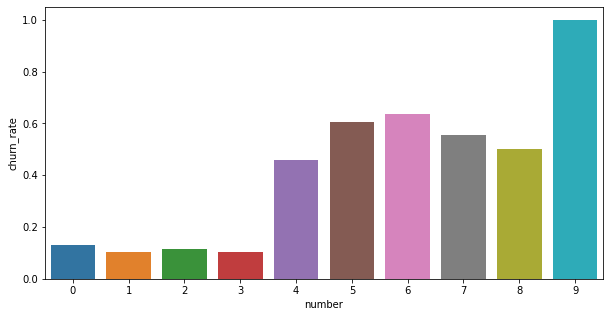

In [206]:
plt.figure(figsize=(10,5))
sb.barplot(y='churn_rate', x='number', data=customer_call_churn)

From this bar plot, it is clearly seen that the users who are calling customer care service more than 3 times are churning at higher rate. May be these customers are not happy with the service and if issues are not resolved till 3 customer calls, most of the customers end up churning out from the service.

# State wise churned customers data

In [208]:
pd.crosstab(telecom_df['State'], telecom_df['Churn'], margins=True)

Churn,False,True,All
State,,,
AK,49,3,52
AL,72,8,80
AR,44,11,55
AZ,60,4,64
CA,25,9,34
CO,57,9,66
CT,62,12,74
DC,49,5,54
DE,52,9,61


In [209]:
state_churn = pd.pivot_table(telecom_df,index=['State'],values=['Churn'], aggfunc = np.mean)
state_churn = state_churn.sort_values(by = 'Churn', ascending = False)
state_churn

,Churn
State,
NJ,0.264706
CA,0.264706
TX,0.250000
MD,0.242857
SC,0.233333
MI,0.219178
MS,0.215385
NV,0.212121
WA,0.212121


In [74]:
#state_churn = pd.pivot_table(telecom_df,index=['State'],values=['Churn'], aggfunc = np.mean)
#state_churn = state_churn.sort_values(by = 'Churn', ascending = False)
state_churn['state name'] = state_churn.index

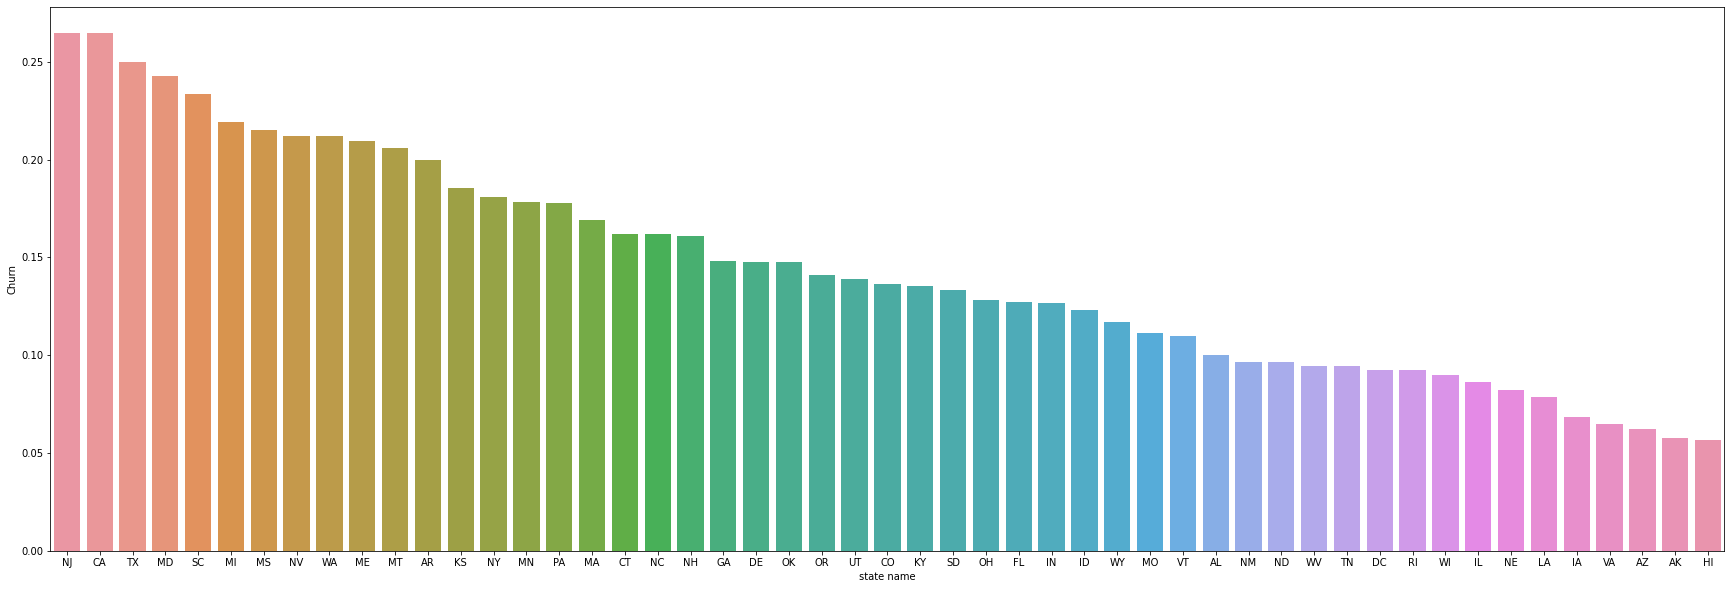

In [75]:
plt.figure(figsize=(30,10))
sb.barplot(y='Churn', x='state name', data=state_churn)

In [ ]:
#Intl_churn_table = pd.pivot_table(telecom_df, values='Churn', index=['International plan'], aggfunc=[len,np.sum,np.mean])
#Intl_churn_table

In [ ]:

corr_df = telecom_df.corr()

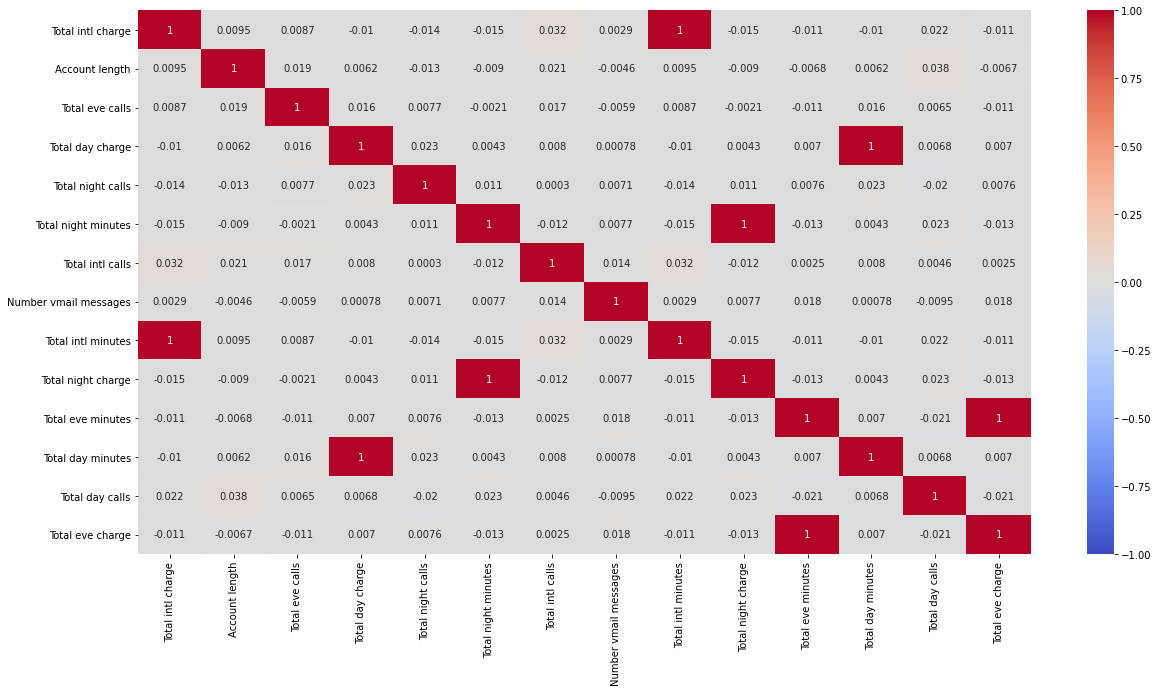

In [ ]:
numerical = list(set(numerical)-set(['total day charge', 'total eve charge', 'total night charge', 'total intl charge']))
corr_matrix = telecom_df[numerical].corr()
plt.figure(figsize=(20,10))
sb.heatmap(corr_matrix, vmin = -1, cmap = 'coolwarm', annot = True);

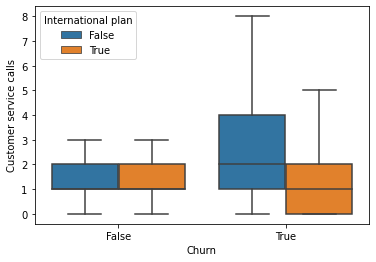

In [128]:
sb.boxplot(x = 'Churn',
            y = 'Customer service calls',
            data = telecom_df,
            sym = "",
            hue = "International plan")

In [ ]:
telecom_df['Customer_calls_beyond_3'] = (telecom_df['Customer service calls'] > 3)

In [ ]:
telecom_df['Customer_calls_less_equal_3'] = (telecom_df['Customer service calls'] <= 3)

In [ ]:
telecom_df['Churn_with_voice_plan'] = (telecom_df['Churn'] & telecom_df['Cust_calls_beyond_3_voice_plan'])

In [ ]:
telecom_df.groupby([ 'Voice mail plan', 'International plan', 'Customer_calls_beyond_3','Churn']).agg({'Churn':'count','Customer service calls': np.mean})

Churn  Customer service calls
Voice mail plan International plan Customer_calls_beyond_3 Churn                               
No              No                 False                   False   1796                1.332405
                                                           True     207                1.265700
                                   True                    False     82                4.390244
                                                           True      95                4.736842
                Yes                False                   False    125                1.280000
                                                           True      88                1.170455
                                   True                    False      5                4.000000
                                                           True      13                4.230769
Yes             No                 False                   False    748                1.267380
                                                           True      20                1.650000
                                   True                    False     38                4.684211
                                                           True      24                4.666667
                Yes                False                   False     52                1.096154
                                                           True      30                1.000000
                                   True                    False      4                4.000000
                                                           True       6                5.333333

In [ ]:
telecom_df.groupby('State').agg({'State':'count', 'Voice mail plan':np.sum,'International plan':np.sum, 'Customer_calls_beyond_3':np.sum, 'Cust_calls_beyond_3_voice_plan':np.sum, 'Cust_calls_beyond_3_Intl_plan':np.sum, 'Churn':np.sum, 'Churn_with_intl_plan':np.sum,'Churn_with_voice_plan':np.sum})

,State,Voice mail plan,International plan,Customer_calls_beyond_3,Cust_calls_beyond_3_voice_plan,Cust_calls_beyond_3_Intl_plan,Churn,Churn_with_intl_plan,Churn_with_voice_plan
State,,,,,,,,,
AK,52,16,4,3,0,0,3,0,0
AL,80,21,8,6,0,1,8,1,0
AR,55,14,8,8,2,3,11,2,1
AZ,64,19,3,7,0,0,4,0,0
CA,34,11,4,5,2,0,9,0,1
CO,66,19,4,9,2,0,9,0,0
CT,74,21,8,5,3,0,12,0,1
DC,54,18,5,3,1,0,5,0,0
DE,61,15,10,5,1,1,9,1,0


In [ ]:
numerical = list(set(telecom_df.columns)-set(['State', 'International plan', 'Voice mail plan',
                                     'Area code', 'Churn']))

In [ ]:
numerical

['Total day charge',
 'Total day minutes',
 'Number vmail messages',
 'Total intl calls',
 'Total night minutes',
 'Total night charge',
 'Total day calls',
 'Total night calls',
 'Total eve calls',
 'Total eve minutes',
 'Total intl minutes',
 'Customer service calls',
 'Total eve charge',
 'Total intl charge',
 'Account length']

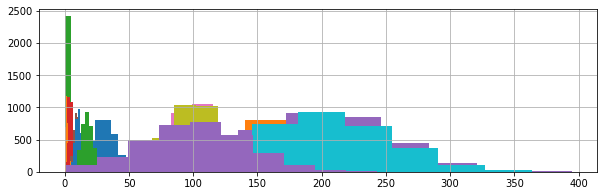

In [ ]:


for i,col in enumerate(numerical):
  telecom_df[col].hist(figsize=(10,3))





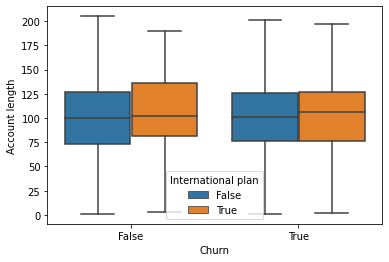

In [ ]:
sb.boxplot(x= 'Churn', y = 'Account length', data = telecom_df, sym = '', hue = 'International plan')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


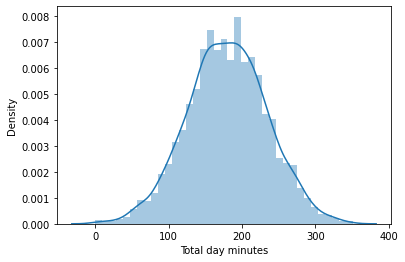

In [ ]:
sb.distplot(telecom_df['Total day minutes'])
plt.show()